In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\Kaggle Competetion\Kaggle Titanic Passenger Death Prediction\train.csv")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df = df.drop("PassengerId", axis=1)
df = df.drop("Name", axis=1)
df = df.drop("Ticket", axis=1)
df = df.drop("Fare", axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


In [3]:
df.shape

(891, 8)

In [4]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Cabin        object
Embarked     object
dtype: object

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

In [6]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Cabin"] = df["Cabin"].fillna(df["Cabin"].mode()[0])
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Cabin       False
Embarked    False
dtype: bool

<Axes: >

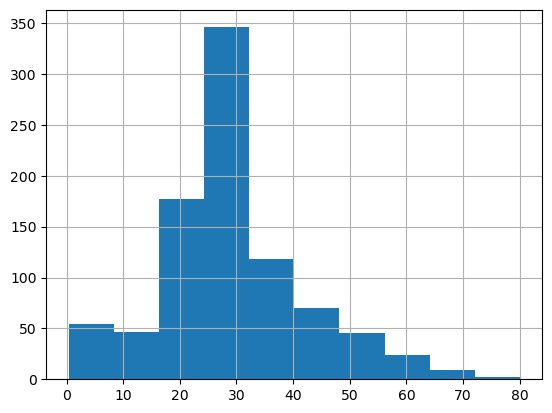

In [7]:
df["Age"].hist()

df["Age"] = np.log1p(df["Age"])
df["Age"].hist()

In [8]:
# df["Fare"].hist()

df["Fare"] = np.log1p(df["Fare"])
df["Fare"].hist()

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,B96 B98,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,B96 B98,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,B96 B98,S


In [10]:
def update_cols(dframe):
    cat_cols = []
    num_cols = []
    for column in dframe.columns:
        if dframe[column].dtypes == object:
            cat_cols.append(column)
        else:
            num_cols.append(column)
    return cat_cols, num_cols

In [11]:
cat_cols, num_cols = update_cols(df)

In [12]:
cat_cols

['Sex', 'Cabin', 'Embarked']

In [13]:
num_cols

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']

In [14]:
num_cols.remove("Survived")

<Axes: >

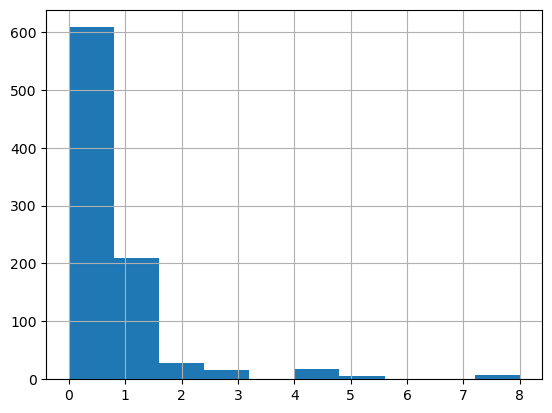

In [15]:
df["SibSp"].hist()

In [16]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,13.002015,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,B96 B98,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,B96 B98,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,B96 B98,S


In [18]:
map_pclass = {
    3 : "Class 3",
    2 : "Class 2",
    1 : "Class 1"
}

df["Pclass"] = df["Pclass"].replace(map_pclass)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,Class 3,male,22.0,1,0,B96 B98,S
1,1,Class 1,female,38.0,1,0,C85,C
2,1,Class 3,female,26.0,0,0,B96 B98,S
3,1,Class 1,female,35.0,1,0,C123,S
4,0,Class 3,male,35.0,0,0,B96 B98,S


In [20]:
for i in range(len(df)):
    if df.iloc[i, df.columns.get_loc("Cabin")] != "B96 B98":
        df.iloc[i, df.columns.get_loc("Cabin")] = "Other"
        


In [21]:
df.columns.get_loc("Cabin")

6

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,Class 3,male,22.0,1,0,B96 B98,S
1,1,Class 1,female,38.0,1,0,Other,C
2,1,Class 3,female,26.0,0,0,B96 B98,S
3,1,Class 1,female,35.0,1,0,Other,S
4,0,Class 3,male,35.0,0,0,B96 B98,S


In [23]:
cat_cols, num_cols = update_cols(df)

In [24]:
dummies = pd.get_dummies(df[cat_cols])
dummies.head()

,Pclass_Class 1,Pclass_Class 2,Pclass_Class 3,Sex_female,Sex_male,Cabin_B96 B98,Cabin_Other,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,1,0,0,0,1
1,1,0,0,1,0,0,1,1,0,0
2,0,0,1,1,0,1,0,0,0,1
3,1,0,0,1,0,0,1,0,0,1
4,0,0,1,0,1,1,0,0,0,1


In [25]:
X_train = pd.concat([dummies, df[num_cols]], axis=1)
X_train = X_train.sort_index(axis=1)
X_train = X_train.drop("Survived", axis=1)
X_train.head()

,Age,Cabin_B96 B98,Cabin_Other,Embarked_C,Embarked_Q,Embarked_S,Parch,Pclass_Class 1,Pclass_Class 2,Pclass_Class 3,Sex_female,Sex_male,SibSp
0,22.0,1,0,0,0,1,0,0,0,1,0,1,1
1,38.0,0,1,1,0,0,0,1,0,0,1,0,1
2,26.0,1,0,0,0,1,0,0,0,1,1,0,0
3,35.0,0,1,0,0,1,0,1,0,0,1,0,1
4,35.0,1,0,0,0,1,0,0,0,1,0,1,0


In [26]:
y_train = df["Survived"]

In [27]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
X_train.shape, y_train.shape

((891, 13), (891,))

In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)

X_train.shape, y_train.shape


((1098, 13), (1098,))

# Now preprocessing for the test dataset

In [30]:
df = pd.read_csv(r"D:\Kaggle Competetion\Kaggle Titanic Passenger Death Prediction\test.csv")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
df = df.drop("PassengerId", axis=1)
df = df.drop("Name", axis=1)
df = df.drop("Ticket", axis=1)
df = df.drop("Fare", axis=1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,34.5,0,0,NaN,Q
1,3,female,47.0,1,0,NaN,S
2,2,male,62.0,0,0,NaN,Q
3,3,male,27.0,0,0,NaN,S
4,3,female,22.0,1,1,NaN,S


In [32]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
# df["Fare"] = df["Fare"].fillna(df["Fare"].mean())
df["Cabin"] = df["Cabin"].fillna(df["Cabin"].mode()[0])
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Cabin       False
Embarked    False
dtype: bool

df["Age"] = np.log1p(df["Age"])

df["Fare"] = np.log1p(df["Fare"])

In [33]:
map_pclass = {
    3 : "Class 3",
    2 : "Class 2",
    1 : "Class 1"
}

df["Pclass"] = df["Pclass"].replace(map_pclass)

In [34]:
for i in range(len(df)):
    if df.iloc[i, df.columns.get_loc("Cabin")] != "B96 B98":
        df.iloc[i, df.columns.get_loc("Cabin")] = "Other"
        


In [35]:
cat_cols, num_cols = update_cols(df)

In [36]:
dummies = pd.get_dummies(df[cat_cols])
dummies.head()

,Pclass_Class 1,Pclass_Class 2,Pclass_Class 3,Sex_female,Sex_male,Cabin_Other,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,1,0,1,0
1,0,0,1,1,0,1,0,0,1
2,0,1,0,0,1,1,0,1,0
3,0,0,1,0,1,1,0,0,1
4,0,0,1,1,0,1,0,0,1


In [37]:
X_test = pd.concat([dummies, df[num_cols]], axis=1)
X_test.sort_index(axis=1)
X_test.head()

,Pclass_Class 1,Pclass_Class 2,Pclass_Class 3,Sex_female,Sex_male,Cabin_Other,Embarked_C,Embarked_Q,Embarked_S,Age,SibSp,Parch
0,0,0,1,0,1,1,0,1,0,34.5,0,0
1,0,0,1,1,0,1,0,0,1,47.0,1,0
2,0,1,0,0,1,1,0,1,0,62.0,0,0
3,0,0,1,0,1,1,0,0,1,27.0,0,0
4,0,0,1,1,0,1,0,0,1,22.0,1,1


In [38]:
X_train.shape, X_test.shape, y_train.shape

((1098, 13), (418, 12), (1098,))

In [39]:
X_train.head()

,Age,Cabin_B96 B98,Cabin_Other,Embarked_C,Embarked_Q,Embarked_S,Parch,Pclass_Class 1,Pclass_Class 2,Pclass_Class 3,Sex_female,Sex_male,SibSp
0,22.0,1,0,0,0,1,0,0,0,1,0,1,1
1,38.0,0,1,1,0,0,0,1,0,0,1,0,1
2,26.0,1,0,0,0,1,0,0,0,1,1,0,0
3,35.0,0,1,0,0,1,0,1,0,0,1,0,1
4,35.0,1,0,0,0,1,0,0,0,1,0,1,0


In [40]:
zeros = pd.DataFrame(columns=["Cabin_B96 B98"])

X_test["Cabin_B96 B98"] = zeros
X_test["Cabin_B96 B98"] = X_test["Cabin_B96 B98"].fillna(0)

In [41]:
X_test = X_test.sort_index(axis=1)
X_test.head()

,Age,Cabin_B96 B98,Cabin_Other,Embarked_C,Embarked_Q,Embarked_S,Parch,Pclass_Class 1,Pclass_Class 2,Pclass_Class 3,Sex_female,Sex_male,SibSp
0,34.5,0,1,0,1,0,0,0,0,1,0,1,0
1,47.0,0,1,0,0,1,0,0,0,1,1,0,1
2,62.0,0,1,0,1,0,0,0,1,0,0,1,0
3,27.0,0,1,0,0,1,0,0,0,1,0,1,0
4,22.0,0,1,0,0,1,1,0,0,1,1,0,1


In [42]:
X_train.shape, X_test.shape, y_train.shape

((1098, 13), (418, 13), (1098,))

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 18],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid = params, cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_

best_rf = RandomForestClassifier(**best_params, random_state=42)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print(best_params)

for random forest= 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

svm = SVC(random_state=42)


param_grid = {
    'C': np.linspace(10, 25, 30),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_svm = SVC(**best_params, random_state=42)


best_svm.fit(X_train, y_train)


y_pred = best_svm.predict(X_test)

print(best_params)

svm = {'C': 18.793103448275865, 'gamma': 'auto', 'kernel': 'rbf'}

import xgboost as xgb
from sklearn.model_selection import GridSearchCV


xgb_classifier = xgb.XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_xgb = xgb.XGBClassifier(**best_params, random_state=42)

best_xgb.fit(X_train, y_train)


y_pred = best_xgb.predict(X_test)

print(best_params)

xgb = {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

adaboost_classifier = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_adaboost = AdaBoostClassifier(**best_params, random_state=42)

best_adaboost.fit(X_train, y_train)

y_pred = best_adaboost.predict(X_test)

print(best_params)

ada = learning_rate': 0.2, 'n_estimators': 200

In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

best_adaboost = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, random_state=42)
best_xgb = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, subsample=0.8, colsample_bytree=0.8, random_state=42)
best_svm = SVC(C=18.793103448275865, kernel='rbf', gamma='auto', probability=True, random_state=42)

from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb



# best_adaboost = AdaBoostClassifier()
# best_xgb = xgb.XGBClassifier()
# best_svm = SVC(probability=True, random_state=42)
best_dt = DecisionTreeClassifier()
best_lg = LogisticRegression(max_iter=1000)
best_nb = MultinomialNB()

voting_classifier = VotingClassifier(estimators=[
    ('adaboost', best_adaboost),
    ('xgb', best_xgb),
    ('svm', best_svm),
    ('decision tree', best_dt),
    ('logistic regression', best_lg),
    ('multinomial naive bayes', best_nb)
], voting='hard')

voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_test)



In [47]:
sample_submission = pd.DataFrame(columns=["PassengerId", "Survived"])
num = len(y_pred)
sample_submission["PassengerId"] = np.linspace(892, 892+num-1, num= num, dtype=int)
sample_submission["Survived"] = y_pred
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [48]:
sample_submission.to_csv("Sample_submission_ttrf.csv", index=False)